<a href="https://colab.research.google.com/github/PIYALI-bhunia/DEEP_LEARNING/blob/main/MLP_classifire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

In [31]:
(X_train , y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

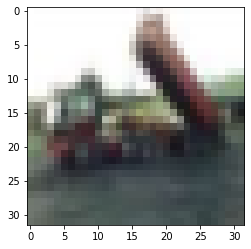

In [32]:

#plot the first image in the dataset
plt.imshow(X_train[2])

In [24]:
X_train = X_train / 255
X_test = X_test / 255

In [25]:
# # Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(layers.Flatten(input_shape= (32,32,3)))

classifier.add(Dense(units= 512, kernel_initializer='he_uniform',activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units= 256, kernel_initializer='he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units= 10, kernel_initializer='he_uniform', activation = 'softmax'))



In [ ]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=32, epochs = 100)


Epoch 1/100
1047/1047 [==============================] - 8s 8ms/step - loss: 1.5571 - accuracy: 0.4433 - val_loss: 1.5935 - val_accuracy: 0.4315
Epoch 2/100
1047/1047 [==============================] - 7s 7ms/step - loss: 1.5158 - accuracy: 0.4552 - val_loss: 1.5247 - val_accuracy: 0.4534
Epoch 3/100
1047/1047 [==============================] - 7s 7ms/step - loss: 1.4856 - accuracy: 0.4686 - val_loss: 1.5163 - val_accuracy: 0.4662
Epoch 4/100
1047/1047 [==============================] - 7s 7ms/step - loss: 1.4582 - accuracy: 0.4780 - val_loss: 1.5569 - val_accuracy: 0.4481
Epoch 5/100
1047/1047 [==============================] - 6s 6ms/step - loss: 1.4368 - accuracy: 0.4869 - val_loss: 1.5271 - val_accuracy: 0.4548
Epoch 6/100
1047/1047 [==============================] - 6s 6ms/step - loss: 1.4152 - accuracy: 0.4935 - val_loss: 1.5341 - val_accuracy: 0.4604
Epoch 7/100
1047/1047 [==============================] - 7s 7ms/step - loss: 1.4025 - accuracy: 0.4965 - val_loss: 1.5278 - val_ac

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = [np.argmax(element) for element in y_pred]

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)


0.4652
[[543  32  43  34  47  14  17  36 161  73]
 [ 55 493  27  27   9  15  21  37  87 229]
 [100  25 271  83 199  77  99  71  41  34]
 [ 44  22  88 277  91 178 123  75  48  54]
 [ 55  11  96  51 490  48 119  80  34  16]
 [ 43  15  83 191  90 335  94  79  36  34]
 [ 30  22  67  94 132  55 528  27  18  27]
 [ 49  21  54  67 112  66  39 499  25  68]
 [100  57  11  22  37  20  10  22 641  80]
 [ 61 151  14  27  16  15  18  49  74 575]]


In [20]:
from sklearn.metrics import classification_report
print(f"{classification_report(y_test, y_pred)}" )

              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1000
           1       0.58      0.49      0.53      1000
           2       0.36      0.27      0.31      1000
           3       0.32      0.28      0.30      1000
           4       0.40      0.49      0.44      1000
           5       0.41      0.34      0.37      1000
           6       0.49      0.53      0.51      1000
           7       0.51      0.50      0.51      1000
           8       0.55      0.64      0.59      1000
           9       0.48      0.57      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000

